<a href="https://colab.research.google.com/github/Vinaymahto808/predict_heart_disease/blob/main/predict_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset
--- First 5 Rows of the Dataset ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  Heart Disease  
0   2     3              0  
1   0     3              0  
2   0     3              0  
3   1     3              0  
4   3     2              0  

--- Target Variable Distribution ---
Heart Disease
1    526
0    499
Name: count, dtype: int64

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

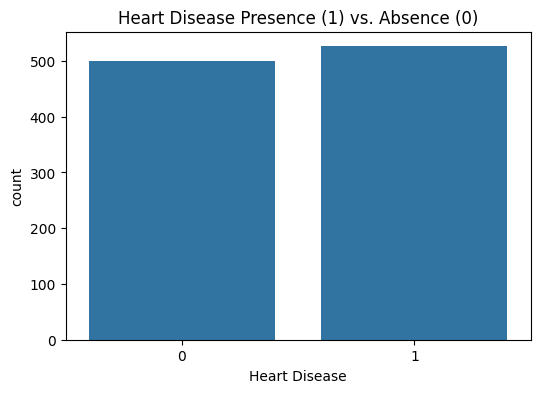

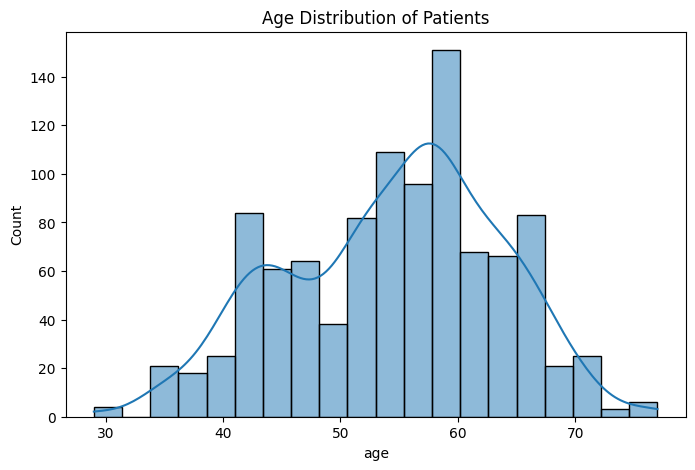

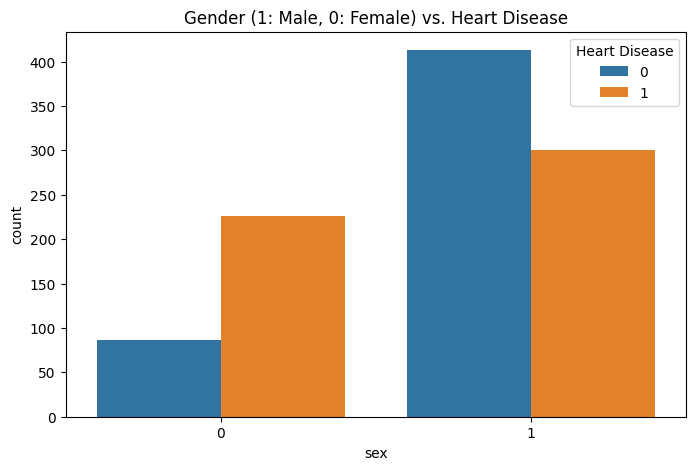

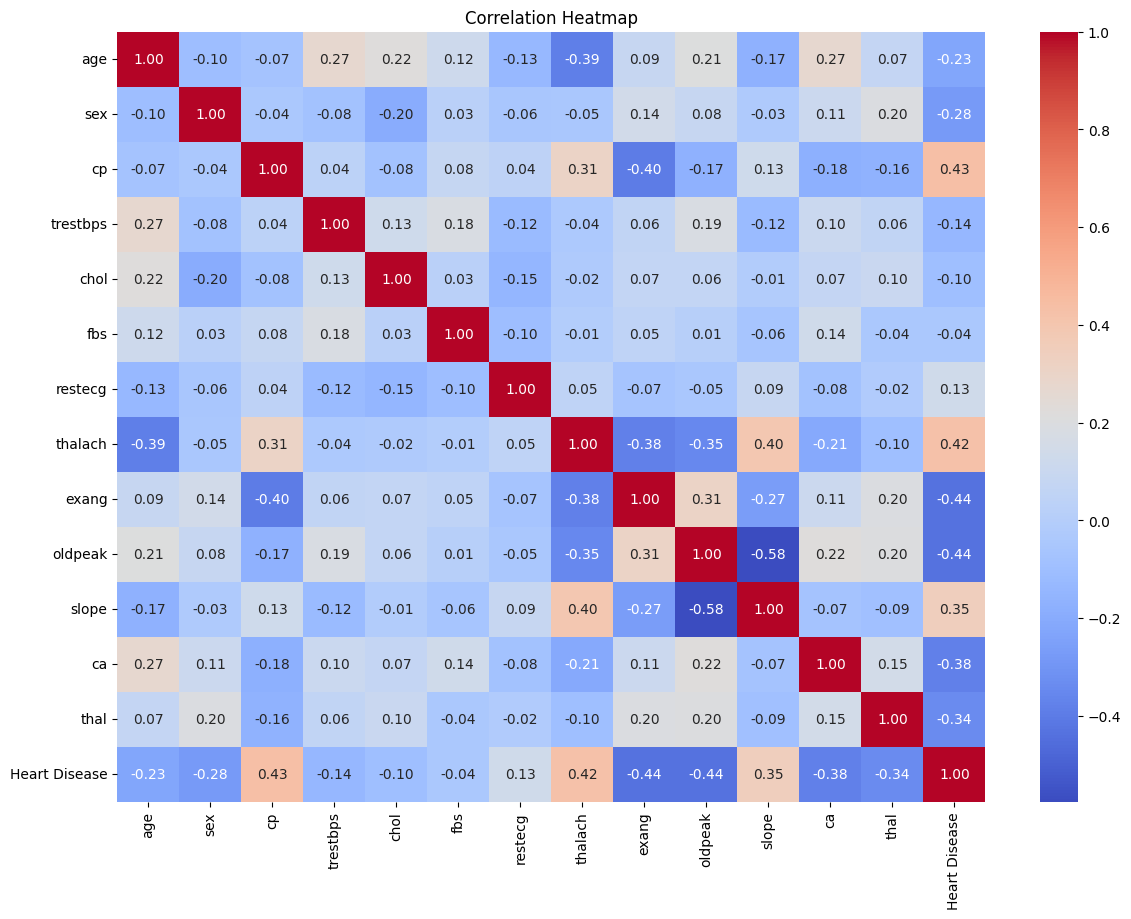


--- Model Accuracy Comparison ---
Logistic Regression: 0.82
Decision Tree: 0.99
Random Forest: 1.00

--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       125
           1       0.80      0.89      0.84       132

    accuracy                           0.82       257
   macro avg       0.83      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



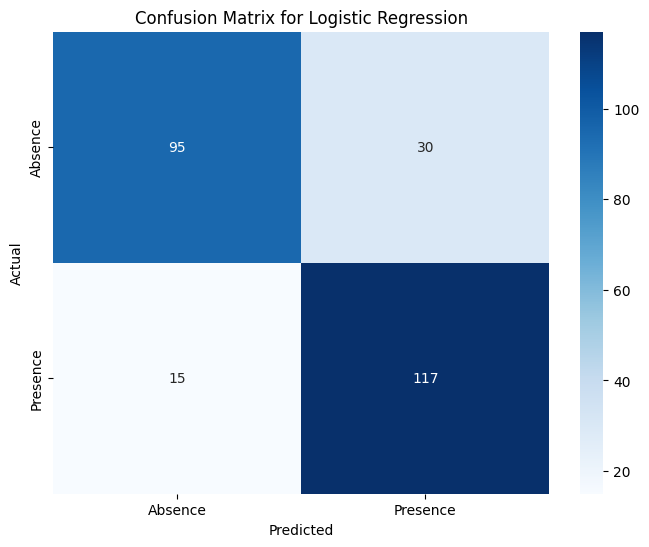


--- Making a Prediction on Sample Data ---

Prediction Result: No heart disease detected.
Confidence: 99.80%


In [ ]:

'''
This script covers the full process of the Heart Disease Prediction project shown in the video.
It includes:
1.  Loading and exploring the data (EDA).
2.  Visualizing the data to find insights.
3.  Preprocessing the data for machine learning.
4.  Training and comparing multiple ML models (Logistic Regression, Decision Tree, Random Forest).
5.  Evaluating the best model using a classification report and confusion matrix.
6.  Saving the best model and the scaler using pickle.
7.  Creating a prediction function to test the model with new data.
'''

# 1. Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle

# Ignore warning messages for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset (replace 'heart.csv' with the actual path to your file)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)
# Load the dataset from the downloaded kagglehub path.
# The dataset typically contains a 'heart.csv' file directly in the downloaded directory.
df = pd.read_csv(f"{path}/heart.csv")

# Rename the 'target' column to 'Heart Disease' for consistency with the rest of the script
df.rename(columns={'target': 'Heart Disease'}, inplace=True)

# The following lines for creating a dummy dataframe are now commented out
# as the actual dataset from kagglehub is being used.
# columns = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'major vessels', 'thalassemia', 'Heart Disease']
# dummy_data = np.random.randint(0, 100, size=(100, 14))
# df = pd.DataFrame(dummy_data, columns=columns)
# df['Heart Disease'] = np.random.choice(['Absence', 'Presence'], 100)


# --- Exploratory Data Analysis (EDA) --- #

# Display the first few rows of the dataset
print("--- First 5 Rows of the Dataset ---")
print(df.head())

# Check the distribution of the target variable 'Heart Disease'
print("\n--- Target Variable Distribution ---")
print(df['Heart Disease'].value_counts())

# The target variable 'Heart Disease' is already numeric (0 and 1), so no mapping is needed.

# Display basic information about the dataset
print("\n--- Dataset Info ---")
df.info()

# Display statistical summary of the dataset
print("\n--- Statistical Summary ---")
print(df.describe())

# Check for any missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

# --- Data Visualization --- #

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Presence (1) vs. Absence (0)')
plt.show()

# Visualize the age distribution of patients
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

# Visualize heart disease count based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='Heart Disease', data=df)
plt.title('Gender (1: Male, 0: Female) vs. Heart Disease')
plt.show()

# Visualize the correlation matrix of all features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- ML Model Preparation --- #

# Separate features (X) and target variable (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the features (important for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Training and Comparison --- #

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

print("\n--- Model Accuracy Comparison ---")
# Loop through models, train them, and print accuracy
for name, model in models.items():
    # Use scaled data for Logistic Regression
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"{name}: {accuracy:.2f}")

# --- Evaluate the Best Model (Logistic Regression) --- #

best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Print Classification Report
print("\n--- Classification Report for Logistic Regression ---")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


# --- Save and Load the Model for Prediction --- #

# Save the trained model and the scaler to files
with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the model and scaler back
with open('heart_disease_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# --- Prediction Function --- #

def predict_heart_disease(input_data):
    '''Takes user input, scales it, and predicts heart disease.'''
    # Convert input data to a numpy array
    patient_data = np.array(input_data).reshape(1, -1)

    # Scale the input data using the loaded scaler
    scaled_data = loaded_scaler.transform(patient_data)

    # Make prediction
    prediction = loaded_model.predict(scaled_data)
    probability = loaded_model.predict_proba(scaled_data)

    if prediction[0] == 1:
        result = "Heart disease is likely present."
    else:
        result = "No heart disease detected."

    confidence = max(probability[0]) * 100

    print(f"\nPrediction Result: {result}")
    print(f"Confidence: {confidence:.2f}%")

# Example of how to use the prediction function
# These values correspond to the 13 features of the dataset
sample_patient_input = [62, 1, 3, 150, 290, 1, 2, 120, 1, 2.6, 1, 2, 7]
print("\n--- Making a Prediction on Sample Data ---")
predict_heart_disease(sample_patient_input)


--- Data Loading and Initial Preprocessing ---
Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset loaded successfully.

--- Data Splitting and Scaling ---
Data split and scaled successfully.

--- Classification Model Training and Comparison ---
Logistic Regression: Accuracy = 0.82
Linear Regression: Accuracy = 0.82
Decision Tree: Accuracy = 0.99
Random Forest: Accuracy = 1.00

--- Evaluating Best Classification Model (Random Forest) ---

--- Classification Report for Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



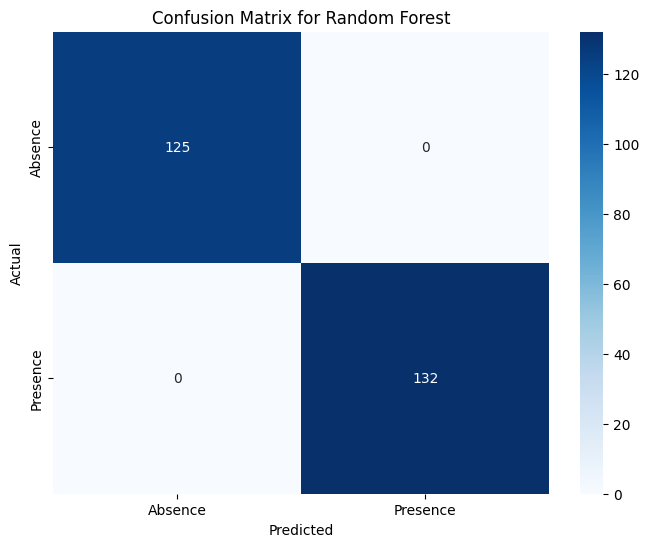


--- ROC Curve Analysis ---


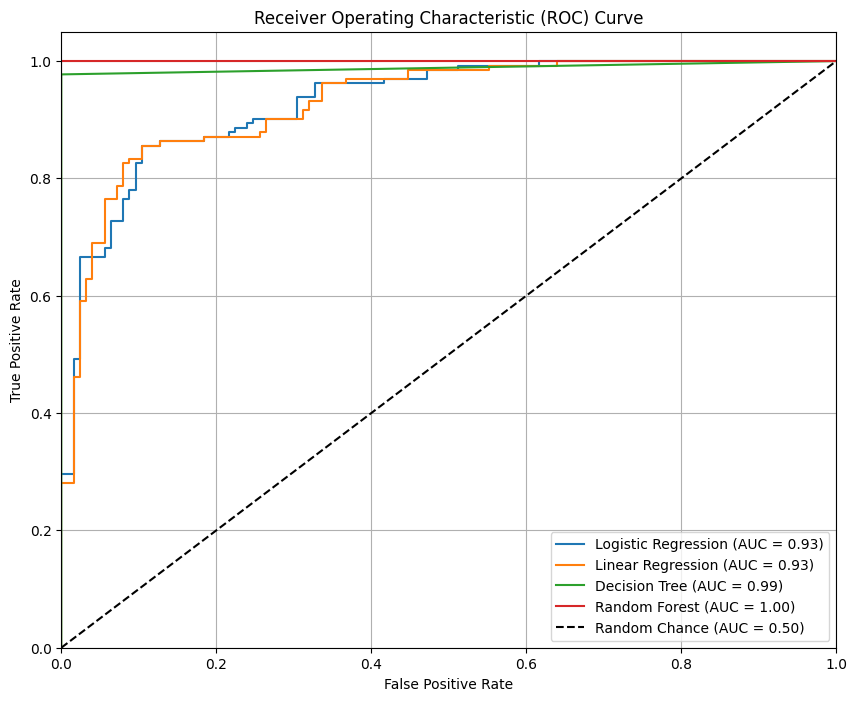


--- Classification Model Comparison Chart ---


,Accuracy,AUC Score
Logistic Regression,0.824903,0.929818
Linear Regression,0.817121,0.929758
Decision Tree,0.988327,0.988636
Random Forest,1.000000,1.000000



--- Visualizing Classification Model Performance ---


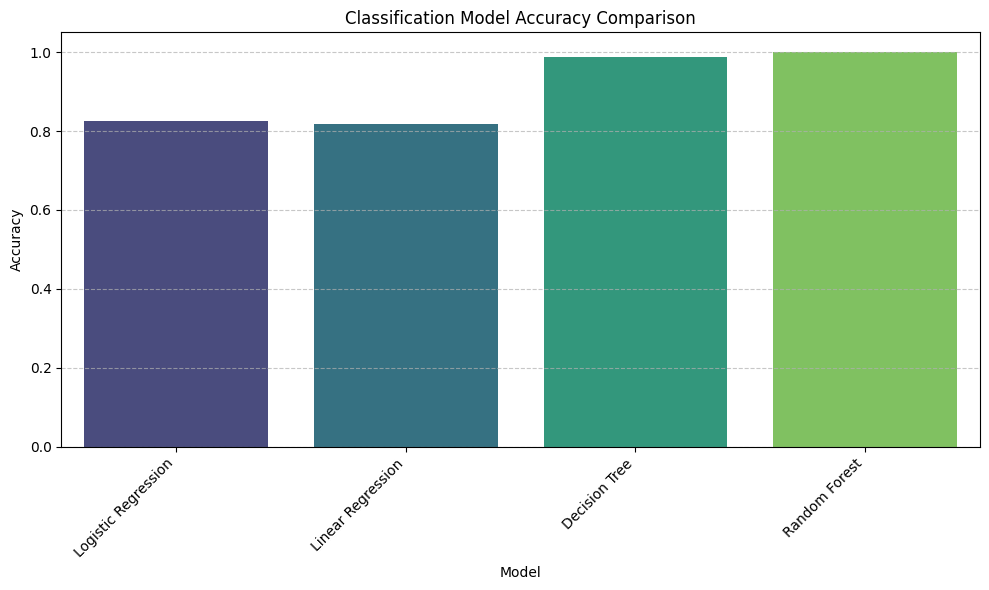

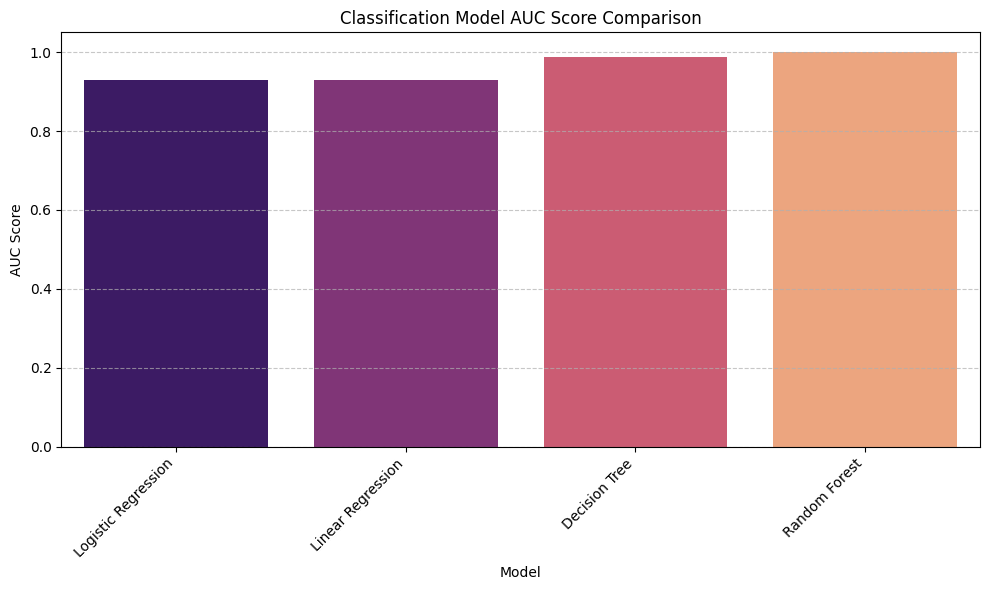


--- Regression Model Training and Comparison (Predicting Risk Score) ---
Logistic Regression (as Regressor): R2 Score = 0.56
Linear Regression: R2 Score = 0.51
Decision Tree Regressor: R2 Score = 0.95
Random Forest Regressor: R2 Score = 0.95

--- Regression Model R2 Score Comparison Chart ---


,R2 Score
Logistic Regression (as Regressor),0.557841
Linear Regression,0.514257
Decision Tree Regressor,0.953273
Random Forest Regressor,0.953440



--- Visualizing Regression Model R2 Scores ---


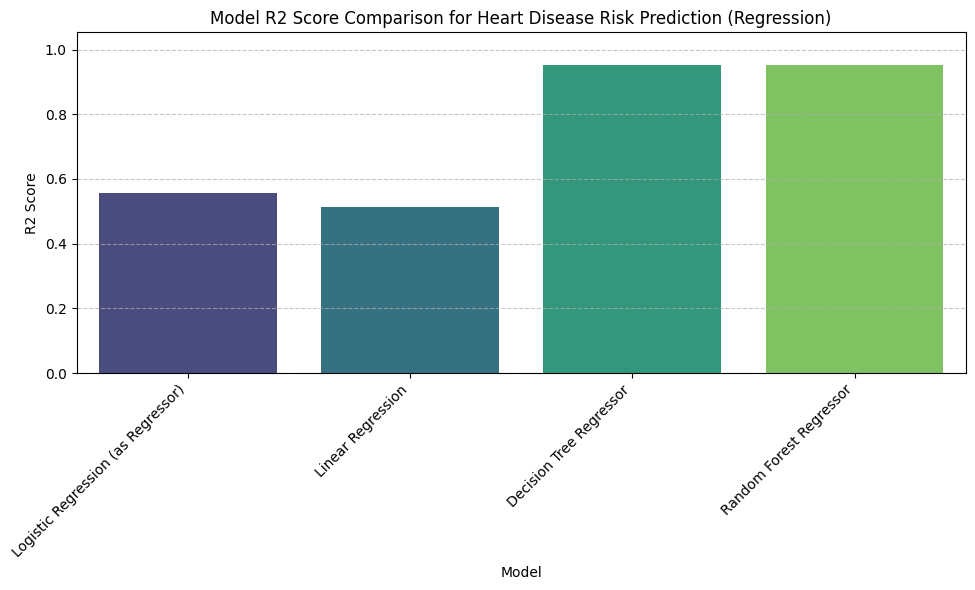


--- Saving and Loading Best Classification Model ---
Best classification model and scaler saved and loaded.

--- Making a Prediction on Sample Data using Best Classification Model ---

Prediction Result: No heart disease detected.
Confidence: 84.00%


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score

# Ignore warning messages for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Data Loading and Initial Preprocessing --- #
print("--- Data Loading and Initial Preprocessing ---")
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
df = pd.read_csv(f"{path}/heart.csv")
df.rename(columns={'target': 'Heart Disease'}, inplace=True)
print("Dataset loaded successfully.")

# --- 2. Data Splitting and Scaling --- #
print("\n--- Data Splitting and Scaling ---")
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split and scaled successfully.")

# --- 3. Classification Model Training and Comparison (with Linear Regression adapted) --- #
print("\n--- Classification Model Training and Comparison ---")
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

model_accuracies = {}
for name, model in classification_models.items():
    if name in ["Logistic Regression", "Linear Regression"]:
        model.fit(X_train_scaled, y_train)
        raw_predictions = model.predict(X_test_scaled)
        if name == "Linear Regression":
            predictions = (raw_predictions > 0.5).astype(int)
        else:
            predictions = raw_predictions
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    model_accuracies[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

# --- 4. Evaluate the Best Model (Random Forest for Classification) --- #
print("\n--- Evaluating Best Classification Model (Random Forest) ---")
best_classification_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_classification_model.fit(X_train, y_train)
y_pred_best_clf = best_classification_model.predict(X_test)

print("\n--- Classification Report for Random Forest ---")
print(classification_report(y_test, y_pred_best_clf))

cm_best_clf = confusion_matrix(y_test, y_pred_best_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# --- 5. Generate and Plot ROC Curves for Classification Models --- #
print("\n--- ROC Curve Analysis ---")
plt.figure(figsize=(10, 8))
model_aucs = {}

for name, model in classification_models.items():
    if name in ["Logistic Regression", "Linear Regression"]:
        model.fit(X_train_scaled, y_train)
        if name == "Linear Regression":
            y_score = model.predict(X_test_scaled)
        else:
            y_score = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    model_aucs[name] = roc_auc
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- 6. Tabular Comparison of Classification Models --- #
print("\n--- Classification Model Comparison Chart ---")
comparison_df_clf = pd.DataFrame({
    'Accuracy': list(model_accuracies.values()),
    'AUC Score': list(model_aucs.values())
}, index=list(model_accuracies.keys()))
display(comparison_df_clf)

# --- 7. Bar Charts for Classification Model Comparison --- #
print("\n--- Visualizing Classification Model Performance ---")
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df_clf.index, y='Accuracy', data=comparison_df_clf, palette='viridis')
plt.title('Classification Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df_clf.index, y='AUC Score', data=comparison_df_clf, palette='magma')
plt.title('Classification Model AUC Score Comparison')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 8. Regression Model Training and Comparison (Predicting Risk Score) --- #
print("\n--- Regression Model Training and Comparison (Predicting Risk Score) ---")
regression_models = {
    "Logistic Regression (as Regressor)": LogisticRegression(max_iter=1000),
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, random_state=42)
}

model_r2_scores = {}
for name, model in regression_models.items():
    if name in ["Logistic Regression (as Regressor)", "Linear Regression"]:
        model.fit(X_train_scaled, y_train)
        if name == "Logistic Regression (as Regressor)":
            y_pred_continuous = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_continuous = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_continuous = model.predict(X_test)

    r2 = r2_score(y_test, y_pred_continuous)
    model_r2_scores[name] = r2
    print(f"{name}: R2 Score = {r2:.2f}")

# --- 9. Tabular Comparison of Regression Models --- #
print("\n--- Regression Model R2 Score Comparison Chart ---")
r2_comparison_df = pd.DataFrame({
    'R2 Score': list(model_r2_scores.values())
}, index=list(model_r2_scores.keys()))
display(r2_comparison_df)

# --- 10. Bar Chart for Regression Model R2 Score Comparison --- #
print("\n--- Visualizing Regression Model R2 Scores ---")
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_comparison_df.index, y='R2 Score', data=r2_comparison_df, palette='viridis')
plt.title('Model R2 Score Comparison for Heart Disease Risk Prediction (Regression)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(min(0, r2_comparison_df['R2 Score'].min() - 0.1), r2_comparison_df['R2 Score'].max() + 0.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 11. Save and Load the Best Classification Model for Prediction --- #
print("\n--- Saving and Loading Best Classification Model ---")
with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(best_classification_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('heart_disease_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
print("Best classification model and scaler saved and loaded.")

# --- 12. Prediction Function using the Best Classification Model --- #
def predict_heart_disease(input_data):
    '''Takes user input, scales it if necessary, and predicts heart disease using the loaded model.'''
    patient_data = np.array(input_data).reshape(1, -1)

    if isinstance(loaded_model, (LogisticRegression, LinearRegression)):
        scaled_data = loaded_scaler.transform(patient_data)
        prediction = loaded_model.predict(scaled_data)
        if isinstance(loaded_model, LinearRegression):
             score = loaded_model.predict(scaled_data)[0]
             probability_class_1 = max(0.0, min(1.0, score))
             probability = np.array([[1 - probability_class_1, probability_class_1]])
        else:
            probability = loaded_model.predict_proba(scaled_data)
    else: # Decision Tree, Random Forest
        prediction = loaded_model.predict(patient_data)
        probability = loaded_model.predict_proba(patient_data)

    if prediction[0] == 1:
        result = "Heart disease is likely present."
    else:
        result = "No heart disease detected."

    confidence = max(probability[0]) * 100

    print(f"\nPrediction Result: {result}")
    print(f"Confidence: {confidence:.2f}%")

# Example of how to use the prediction function
sample_patient_input = [62, 1, 3, 150, 290, 1, 2, 120, 1, 2.6, 1, 2, 7]
print("\n--- Making a Prediction on Sample Data using Best Classification Model ---")
predict_heart_disease(sample_patient_input)

# Task
Set up a Flask application, install necessary dependencies like Flask and firebase-admin, and integrate the Firebase Admin SDK by initializing it with your Firebase service account credentials.

## Set Up Flask Application

### Subtask:
Create a basic Flask application structure and install necessary dependencies like Flask and firebase-admin.


**Reasoning**:
First, install the Flask library to enable web application development.



In [19]:
!pip install Flask

**Reasoning**:
Next, install the `firebase-admin` library to integrate Firebase services into the Flask application.



In [20]:
pip install firebase-admin

**Reasoning**:
Now that the necessary libraries are installed, the next step is to create the `app.py` file and add the basic Flask application structure to it, as instructed by the subtask.



In [21]:
app_py_code = '''
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/')
def home():
    return 'Flask App is Running!'

if __name__ == '__main__':
    app.run(debug=True, port=5000)
'''

with open('app.py', 'w') as f:
    f.write(app_py_code)

print("Created app.py with basic Flask application structure.")

Created app.py with basic Flask application structure.


**Reasoning**:
The next step is to run the created `app.py` file to start the Flask application and verify that it's running correctly, as specified in the instructions.



# Task
Run the `app.py` file to start the Flask application.

## Run the app.py file to start the Flask application.

### Subtask:
Run the Flask application created in `app.py`.


**Reasoning**:
To run the Flask application, I will execute the `app.py` file using the `python` command. This will start the Flask server, and its output will show the URL where the application is accessible, allowing the user to verify it is running.



In [23]:
print("Starting Flask application. Please open the displayed URL in a new browser tab to verify.\n")
# Run the Flask application. This cell will remain active while the Flask app is running.
# You may need to stop its execution (e.g., by clicking the stop button next to the cell)
# once you have verified the app is running in your browser.
!python app.py

Starting Flask application. Please open the displayed URL in a new browser tab to verify.

 * Serving Flask app 'app'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
 * Debugger is active!
 * Debugger PIN: 462-506-135
^C


# Task
To proceed, we need to integrate the Firebase Admin SDK into the Flask application by initializing it with your Firebase service account credentials.

First, you'll need to obtain your Firebase service account key:
1.  Go to your Firebase project in the Firebase console.
2.  Click on "Project settings" (the gear icon) in the left sidebar.
3.  Go to the "Service accounts" tab.
4.  Click on "Generate new private key" and then "Generate key". This will download a JSON file containing your service account credentials.

**Task**:
Integrate the Firebase Admin SDK into `app.py` by adding code to initialize it using the downloaded service account key. Ensure the application is set up to load the credentials securely.

## Implement User Login Endpoint

### Subtask:
Integrate the Firebase Admin SDK into `app.py` by adding code to initialize it using the downloaded service account key. Ensure the application is set up to load the credentials securely.


### Important: Download and Upload Firebase Service Account Key

Before proceeding, please follow these steps:

1.  **Download your Firebase service account key JSON file** from the Firebase console (Project settings -> Service accounts -> Generate new private key). Name this file `serviceAccountKey.json`.
2.  **Upload the `serviceAccountKey.json` file** to the same directory where your `app.py` file is located in your Google Colab environment. You can do this by clicking the folder icon on the left sidebar, navigating to the correct directory, and then clicking the 'Upload' icon.

**Reasoning**:
Now that the user has been instructed to upload the Firebase service account key, I will modify the `app.py` file to integrate the Firebase Admin SDK. This involves importing the necessary Firebase libraries and initializing the SDK with the service account key, including error handling for `FileNotFoundError`.



In [24]:
app_py_code_with_firebase = '''
from flask import Flask, request, jsonify
import firebase_admin
from firebase_admin import credentials, auth
import os

app = Flask(__name__)

# Initialize Firebase Admin SDK
try:
    # Ensure the service account key is in the same directory as app.py
    cred = credentials.Certificate('serviceAccountKey.json')
    firebase_admin.initialize_app(cred)
    print("Firebase Admin SDK initialized successfully.")
except FileNotFoundError:
    print("Error: 'serviceAccountKey.json' not found. Please upload it to the same directory as app.py.")
    # Exit or handle gracefully if Firebase is critical
except ValueError as e:
    print(f"Error initializing Firebase Admin SDK: {e}")

@app.route('/')
def home():
    return 'Flask App is Running and Firebase is configured!'

if __name__ == '__main__':
    app.run(debug=True, port=5000)
'''

with open('app.py', 'w') as f:
    f.write(app_py_code_with_firebase)

print("Modified app.py to include Firebase Admin SDK initialization.")


Modified app.py to include Firebase Admin SDK initialization.


**Reasoning**:
Now that `app.py` has been modified to include Firebase Admin SDK initialization, the next step is to run the Flask application again to verify that Firebase is initialized correctly and the app starts without errors. This will confirm the successful integration of Firebase.



In [25]:
print("Starting Flask application with Firebase initialization. Please open the displayed URL in a new browser tab to verify.
")
# Run the Flask application. This cell will remain active while the Flask app is running.
# You may need to stop its execution (e.g., by clicking the stop button next to the cell)
# once you have verified the app is running in your browser.
!python app.py

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-3187566736.py, line 1)

**Reasoning**:
The previous code block failed due to a `SyntaxError: unterminated string literal`. This happened because the string literal in the `print` statement spanned multiple physical lines without being enclosed in triple quotes or having the newline escaped. I will fix this by ensuring the entire string is on a single line and explicitly using `\n` for the newline character.



In [26]:
print("Starting Flask application with Firebase initialization. Please open the displayed URL in a new browser tab to verify.\n")
# Run the Flask application. This cell will remain active while the Flask app is running.
# You may need to stop its execution (e.g., by clicking the stop button next to the cell)
# once you have verified the app is running in your browser.
!python app.py

Starting Flask application with Firebase initialization. Please open the displayed URL in a new browser tab to verify.

Error: 'serviceAccountKey.json' not found. Please upload it to the same directory as app.py.
 * Serving Flask app 'app'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
Error: 'serviceAccountKey.json' not found. Please upload it to the same directory as app.py.
 * Debugger is active!
 * Debugger PIN: 462-506-135
